## Install the required packages

In [ ]:
!pip install --upgrade pip

!pip install numpy
!pip install pandas
!pip install openpyxl
!pip install ipykernel
!pip install tabulate
!pip install autopep8
!pip install radon
!pip install matplotlib


## Import project modules

In [1]:
import sys
sys.path.append("./source/")
import matplotlib.pyplot as plt
from random import random

from World import World
from Constants import Constants
from VaccineWarehouse import VaccineWarehouse
from Population import Population
from Config import VaccineApproach
from COVIDsim import COVIDsim


## Initialize config

In [2]:
Constants.currentCfg = Constants.testCfg

## Initialize objects and Run the simulation

In [3]:
# Preference based World creation
warehouse = VaccineWarehouse()
population = Population()
population.generate_random_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world = World(warehouse, population)

covid1 = COVIDsim()
covid1.simulate(world, VaccineApproach.PREFERENCE_BASED_VACCINE, True, True)

# Random Vaccine World creation
warehouse2 = VaccineWarehouse()
population2 = Population()
population2.generate_random_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

world2 = World(warehouse2, population2)

covid2 = COVIDsim()
covid2.simulate(world2, VaccineApproach.RANDOM_VACCINE, True, True)

## Check simulation complexity

Explanation:
- cc is the radon command to compute Cyclomatic Complexity
- a tells radon to calculate the average complexity at the end. Note that the average is computed among the shown blocks. If you want the total average, among all the blocks, regardless of what is being shown, you should use --total-average.
- nc tells radon to print only results with a complexity rank of C or worse. Other examples: -na (from A to F), or -nd (from D to F).
The letter in front of the line numbers represents the type of the block (F means function, M method and C class).


Source: 
 + https://pypi.org/project/radon/
 + https://radon.readthedocs.io/en/latest/commandline.html


In [ ]:
!echo __________________ Raw metrics __________________
!radon raw source
!echo __________________ Cyclomatic Complexity __________________
!radon cc source -a -nc
!echo __________________ Maintainability Index __________________
!radon mi source


## Log results

In [4]:
import matplotlib.pyplot as plt

# Avarage person refusal log
def logger(world: World):
    counter = 0
    vaccinated = 0

    for p in world.population.people_list:
        counter += p.offered_counter - (1 if p.accepted else 0)
        if p.accepted:
            vaccinated +=1
    counter /=len([x for x in world.population.people_list if x.offered_counter > 0])

    vac_per = vaccinated*100.0/len(world.population.people_list)
    print(f"Avarage refusal for generated population: {counter}")
    print(f"Vacination ratio: {vaccinated} out of {len(world.population.people_list)}.")
    print(f"{vac_per}% vaccinated after {Constants.currentCfg.execution_time} day.")

print("Random World:")
logger(world)

print("Preference World:")
logger(world2)

#TODO: why is the vaccination ratio is so high?
#TODO: why is the random so similar to the Preference world?

Random World:
Avarage refusal for generated population: 0.7133138969873664
Vacination ratio: 2698 out of 10000.
26.98% vaccinated after 50 day.
Preference World:
Avarage refusal for generated population: 1.0033039647577093
Vacination ratio: 2167 out of 10000.
21.67% vaccinated after 50 day.


### Final vaccination ratio compared to vaccine types

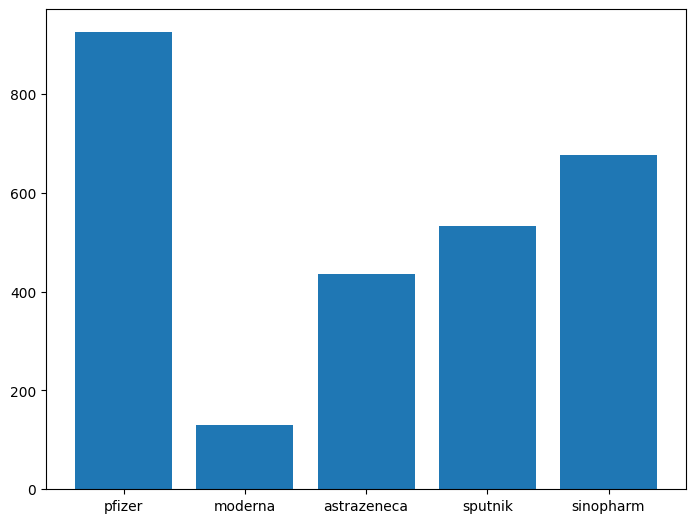

In [5]:
#TODO: label, style, size
vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
chosen_vaccine = [0]*len(vaccine_name_list)

for p in world.population.people_list:
    for vi in range(len(vaccine_name_list)):
        if vaccine_name_list[vi] == p.selected_vaccine:
            chosen_vaccine[vi]+=1
            break

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(vaccine_name_list, chosen_vaccine)
plt.show()

### Refusal ratio compared to vaccine types

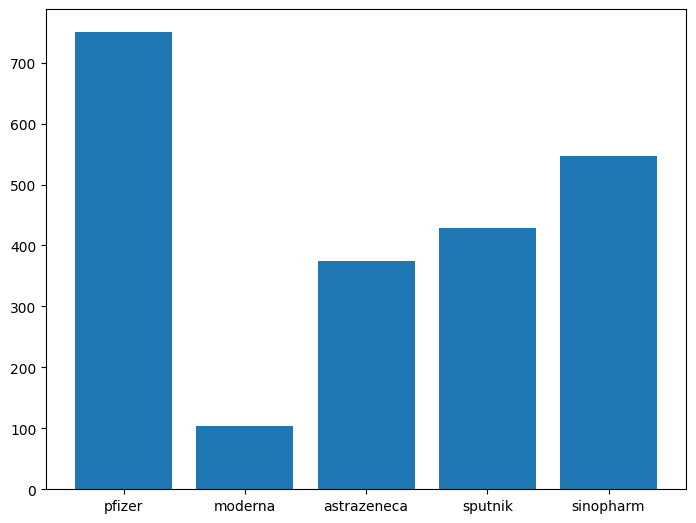

In [6]:
#TODO: label, style, size

vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
refused_vaccine = [0]*len(vaccine_name_list)

for dl in world.district_list:
    for vl in dl.vaccine_list:
        for vi in range(len(vaccine_name_list)):
            if vaccine_name_list[vi] == vl.name:
                refused_vaccine[vi]+=vl.refused_counter
                break

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(vaccine_name_list, refused_vaccine)
plt.show()

### What did people who changed their mind accept at the end?

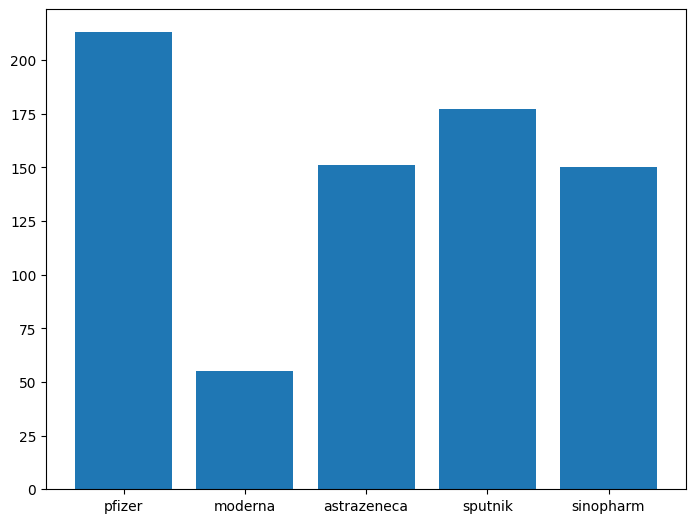

In [7]:
#TODO: label, style, size

vaccine_name_list = [x.name for x in world.warehouse.vaccine_list]
chosen_vaccine = [0]*len(vaccine_name_list)

for p in world.population.people_list:
    for vi in range(len(vaccine_name_list)):
        if vaccine_name_list[vi] == p.selected_vaccine and p.offered_counter > 1:
            chosen_vaccine[vi]+=1
            break

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(vaccine_name_list, chosen_vaccine)
plt.show()

### How did the vaccination ratio changed depending on time?

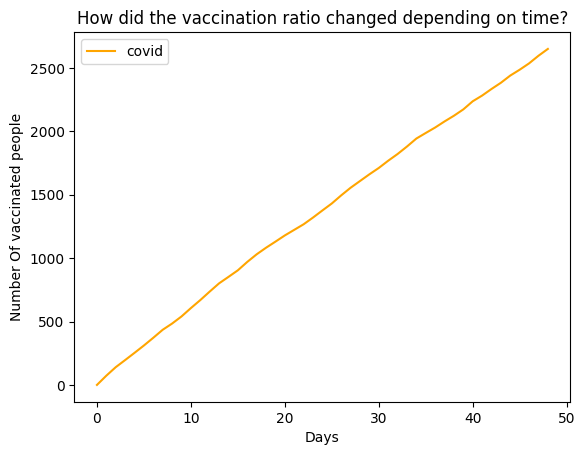

In [8]:
#TODO: label, style, size

days = list(range(0,len(covid1.vaccination_progress)))

  
plt.plot(days, covid1.vaccination_progress, color ='orange', label ='covid')
  
# naming of x-axis and y-axis
plt.xlabel('Days')
plt.ylabel('Number Of vaccinated people')
  
# naming the title of the plot
plt.title('How did the vaccination ratio changed depending on time?')
  
plt.legend()
plt.show()

### How did the vaccination ratio changed depending on time with multiple increasing district_capacity?

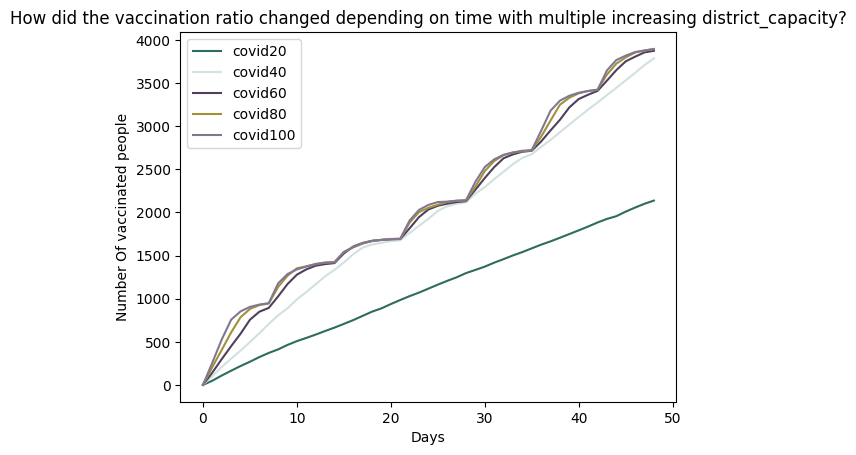

In [4]:
#TODO: label, style, size

def district_increase_test()-> COVIDsim:
    warehouse3 = VaccineWarehouse()
    population3 = Population()
    population3.generate_random_population(Constants.currentCfg.population_size, warehouse.vaccine_list)

    world3 = World(warehouse3, population3)

    covid3 = COVIDsim()
    covid3.simulate(world3, VaccineApproach.RANDOM_VACCINE, True)
    return covid3

days = list(range(0,len(covid1.vaccination_progress)))

starting_capacity = Constants.currentCfg.district_capacity
for i in range(5):
    temp_covid = district_increase_test()
    plt.plot(days, temp_covid.vaccination_progress, 
             color =(random(),random(),random()), 
             label =f'covid{Constants.currentCfg.district_capacity}')
    Constants.currentCfg.district_capacity += starting_capacity
    
Constants.currentCfg.district_capacity = starting_capacity
  
plt.xlabel('Days')
plt.ylabel('Number Of vaccinated people')
  
plt.title('How did the vaccination ratio changed depending on time with multiple increasing district_capacity?')
  
plt.legend()
plt.show()



### Vaccine reduction over time

In [ ]:
#TODO: Vaccine reduction over time
#TODO: label, style, size

### Age and preference distribution

In [ ]:
#TODO: Age and preference distribution (will probably be flat but should be bell shaped)
#TODO: label, style, size


### Real vaccination ratio change compared to simulation.

In [ ]:
#TODO: Real vaccination ratio change compared to simulation.
#TODO: label, style, size